**1. Importing the dependencies**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

**2. Data Loading and Understanding**

In [65]:
# load teh csv data to a pandas dataframe
download_url = f"https://drive.google.com/uc?id=1mjx6tl9MD08uYt_CPWygESL-AOt6avuh"
df=pd.read_csv(download_url)

In [66]:
df.shape

(440833, 12)

In [67]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [68]:
pd.set_option("display.max_columns", None)

In [69]:
df.head(2)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [71]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["CustomerID"])

In [72]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [73]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [74]:
print(df["Gender"].unique())

['Female' 'Male' nan]


In [75]:
# printing the unique values in all the columns

numerical_features_list = ["Last Interaction", "Payment Delay", "Tenure","Usage Frequency",	"Support Calls"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

Age [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62. nan]
--------------------------------------------------
Gender ['Female' 'Male' nan]
--------------------------------------------------
Subscription Type ['Standard' 'Basic' 'Premium' nan]
--------------------------------------------------
Contract Length ['Annual' 'Monthly' 'Quarterly' nan]
--------------------------------------------------
Total Spend [932.   557.   185.   ... 829.59 804.3  959.47]
--------------------------------------------------
Churn [ 1.  0. nan]
--------------------------------------------------


In [76]:
print(df.isnull().sum())

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [77]:
df.fillna(method='ffill', inplace=True)

<ipython-input-77-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [78]:
print(df.isna().sum())

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [79]:
df[df["Support Calls"]==10.0]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
12,22.0,Male,41.0,17.0,10.0,25.0,Basic,Quarterly,265.00,23.0,1.0
30,56.0,Female,59.0,5.0,10.0,27.0,Standard,Quarterly,424.00,2.0,1.0
36,25.0,Female,53.0,2.0,10.0,13.0,Basic,Quarterly,336.00,13.0,1.0
38,51.0,Male,30.0,4.0,10.0,29.0,Premium,Monthly,770.00,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
253570,48.0,Female,4.0,5.0,10.0,13.0,Premium,Quarterly,935.74,17.0,1.0
253584,26.0,Female,17.0,1.0,10.0,30.0,Basic,Monthly,629.11,6.0,1.0
253637,49.0,Female,52.0,13.0,10.0,2.0,Premium,Monthly,495.13,7.0,1.0
253655,63.0,Male,58.0,12.0,10.0,30.0,Basic,Quarterly,368.72,18.0,1.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440833 non-null  float64
 1   Gender             440833 non-null  object 
 2   Tenure             440833 non-null  float64
 3   Usage Frequency    440833 non-null  float64
 4   Support Calls      440833 non-null  float64
 5   Payment Delay      440833 non-null  float64
 6   Subscription Type  440833 non-null  object 
 7   Contract Length    440833 non-null  object 
 8   Total Spend        440833 non-null  float64
 9   Last Interaction   440833 non-null  float64
 10  Churn              440833 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [81]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
1.0    250000
0.0    190833
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [82]:
df.shape

(440833, 11)

In [83]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [84]:
df.head(2)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [85]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000
mean,39.373148,31.256335,15.807465,3.604451,12.965733,631.615661,14.480867,0.567108
std,12.442356,17.255708,8.586254,3.070230,8.258057,240.803017,8.596198,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [86]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

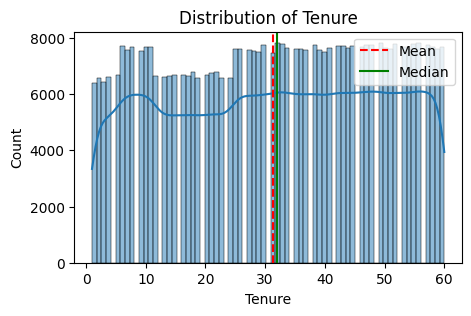

In [87]:
plot_histogram(df, "Tenure")

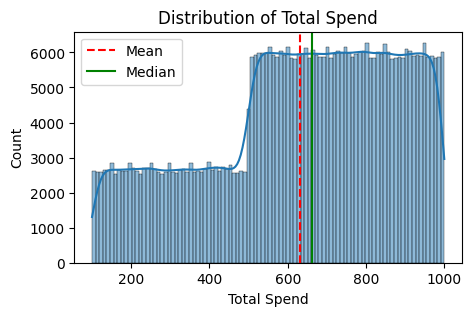

In [88]:
plot_histogram(df, "Total Spend")

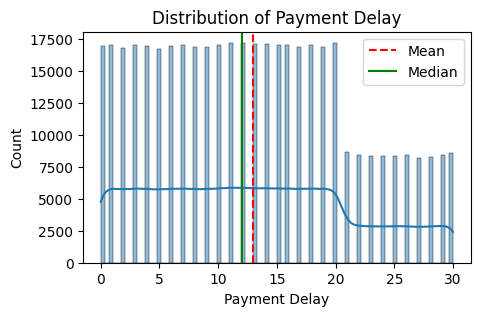

In [89]:
plot_histogram(df, "Payment Delay")

**Box plot for numerical features**

In [90]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

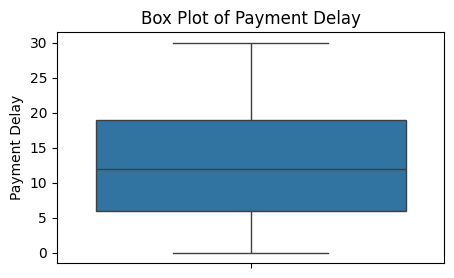

In [91]:
plot_boxplot(df, "Payment Delay")

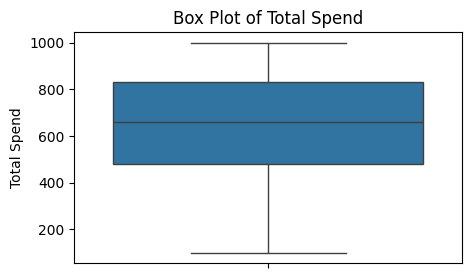

In [92]:
plot_boxplot(df, "Total Spend")

**Correlation Heatmap for numerical columns**

In [93]:
df_encoded = df.copy()
label_encoders = {}
for col in ['Gender', 'Subscription Type', 'Contract Length']:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

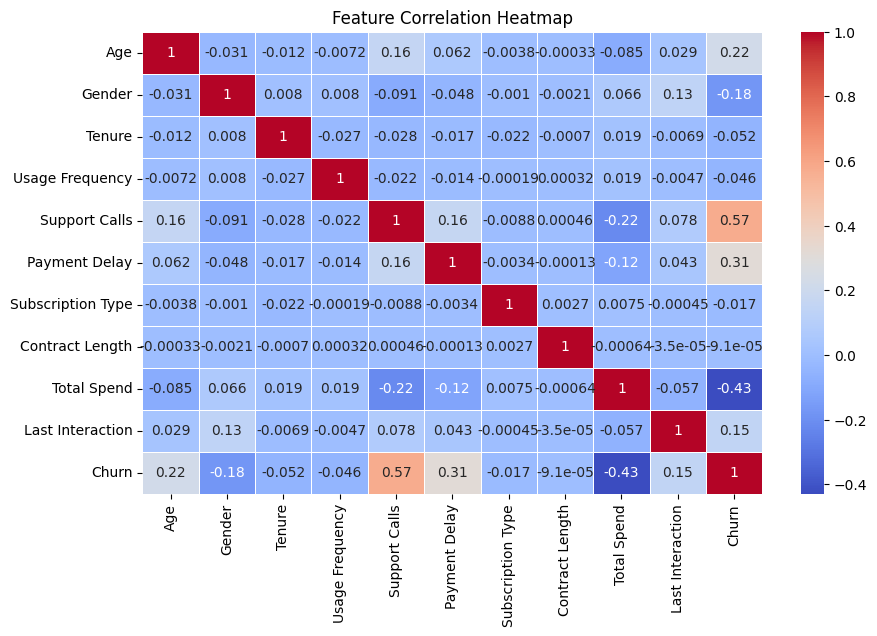

In [94]:
# correlation matrix - heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [95]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


Categorical features - Analysis

In [96]:
df = df.drop(columns=["Subscription Type"])
df = df.drop(columns=["Usage Frequency"])
df = df.drop(columns=["Tenure"])
df = df.drop(columns=["Contract Length"])

In [97]:
df.columns

Index(['Age', 'Gender', 'Support Calls', 'Payment Delay', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               440833 non-null  float64
 1   Gender            440833 non-null  object 
 2   Support Calls     440833 non-null  float64
 3   Payment Delay     440833 non-null  float64
 4   Total Spend       440833 non-null  float64
 5   Last Interaction  440833 non-null  float64
 6   Churn             440833 non-null  float64
dtypes: float64(6), object(1)
memory usage: 23.5+ MB


**4. Data Preprocessing**

In [99]:
df.head(3)

,Age,Gender,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,Female,5.0,18.0,932.0,17.0,1.0
1,65.0,Female,10.0,8.0,557.0,6.0,1.0
2,55.0,Female,6.0,18.0,185.0,3.0,1.0


Label encoding of target column

In [100]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [101]:
df.head(3)

,Age,Gender,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,Female,5.0,18.0,932.0,17.0,1.0
1,65.0,Female,10.0,8.0,557.0,6.0,1.0
2,55.0,Female,6.0,18.0,185.0,3.0,1.0


In [102]:
print(df["Churn"].value_counts())

Churn
1.0    250000
0.0    190833
Name: count, dtype: int64


Label encoding of categorical fetaures

In [103]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [104]:
print(object_columns)

Index(['Gender'], dtype='object')


In [105]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [106]:
encoders

{'Gender': LabelEncoder()}

In [107]:
df.head()

,Age,Gender,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,0,5.0,18.0,932.0,17.0,1.0
1,65.0,0,10.0,8.0,557.0,6.0,1.0
2,55.0,0,6.0,18.0,185.0,3.0,1.0
3,58.0,1,7.0,7.0,396.0,29.0,1.0
4,23.0,1,5.0,8.0,617.0,20.0,1.0


**Traianing and test data split**

In [108]:
# Selecting only numeric columns for scaling
numeric_columns = ['Age', 'Support Calls',
                   'Payment Delay', 'Total Spend', 'Last Interaction']  #, 'Usage Frequency' 'Tenure',
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head())
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


        Age  Gender  Support Calls  Payment Delay  Total Spend  \
0 -0.753327       0       0.454543       0.609620     1.247429   
1  2.059649       0       2.083087      -0.601320    -0.309862   
2  1.255941       0       0.780252       0.609620    -1.854695   
3  1.497054       1       1.105961      -0.722414    -0.978459   
4 -1.315922       1       0.454543      -0.601320    -0.060696   

   Last Interaction  Churn  
0          0.293052    1.0  
1         -0.986585    1.0  
2         -1.335576    1.0  
3          1.689020    1.0  
4          0.642044    1.0  


In [109]:
X, y = df.drop(columns=["Churn"]), df["Churn"]

In [110]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution
print(pd.Series(y_resampled).value_counts())

Churn
1.0    250000
0.0    250000
Name: count, dtype: int64


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
print(X_train.shape,X_test.shape)

(352666, 6) (88167, 6)


In [113]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.85
Confusion Matrix:
 [[32446  5697]
 [ 7372 42652]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38143
         1.0       0.88      0.85      0.87     50024

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



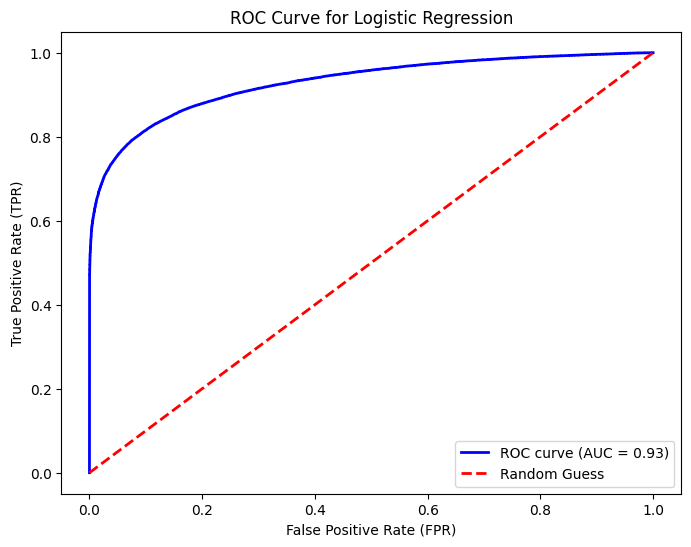

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

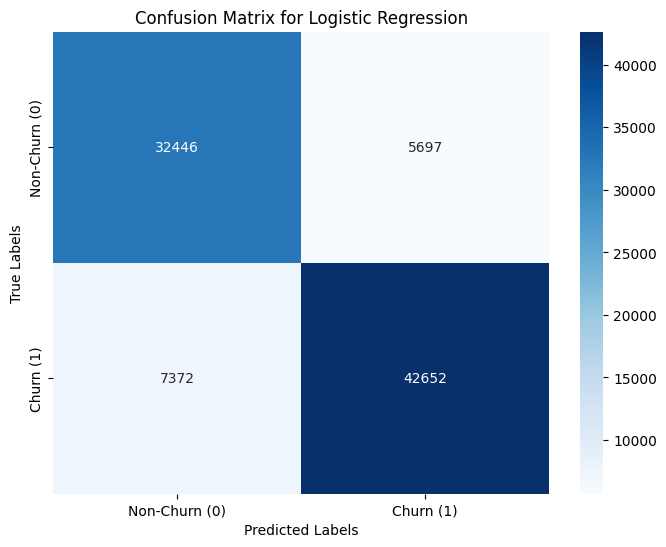

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Churn (0)', 'Churn (1)'],
            yticklabels=['Non-Churn (0)', 'Churn (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9839735955629657
Confusion Matrix:
 [[38119    24]
 [ 1389 48635]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38143
         1.0       1.00      0.97      0.99     50024

    accuracy                           0.98     88167
   macro avg       0.98      0.99      0.98     88167
weighted avg       0.98      0.98      0.98     88167



In [117]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9840983587963751
Confusion Matrix:
 [[38143     0]
 [ 1402 48622]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38143
         1.0       1.00      0.97      0.99     50024

    accuracy                           0.98     88167
   macro avg       0.98      0.99      0.98     88167
weighted avg       0.98      0.98      0.98     88167



In [118]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
with open("churn_model.pkl", "wb") as f:
    pickle.dump(dt, f)

Decision Tree Accuracy: 0.9662912427552259
Confusion Matrix:
 [[36464  1679]
 [ 1293 48731]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     38143
         1.0       0.97      0.97      0.97     50024

    accuracy                           0.97     88167
   macro avg       0.97      0.97      0.97     88167
weighted avg       0.97      0.97      0.97     88167



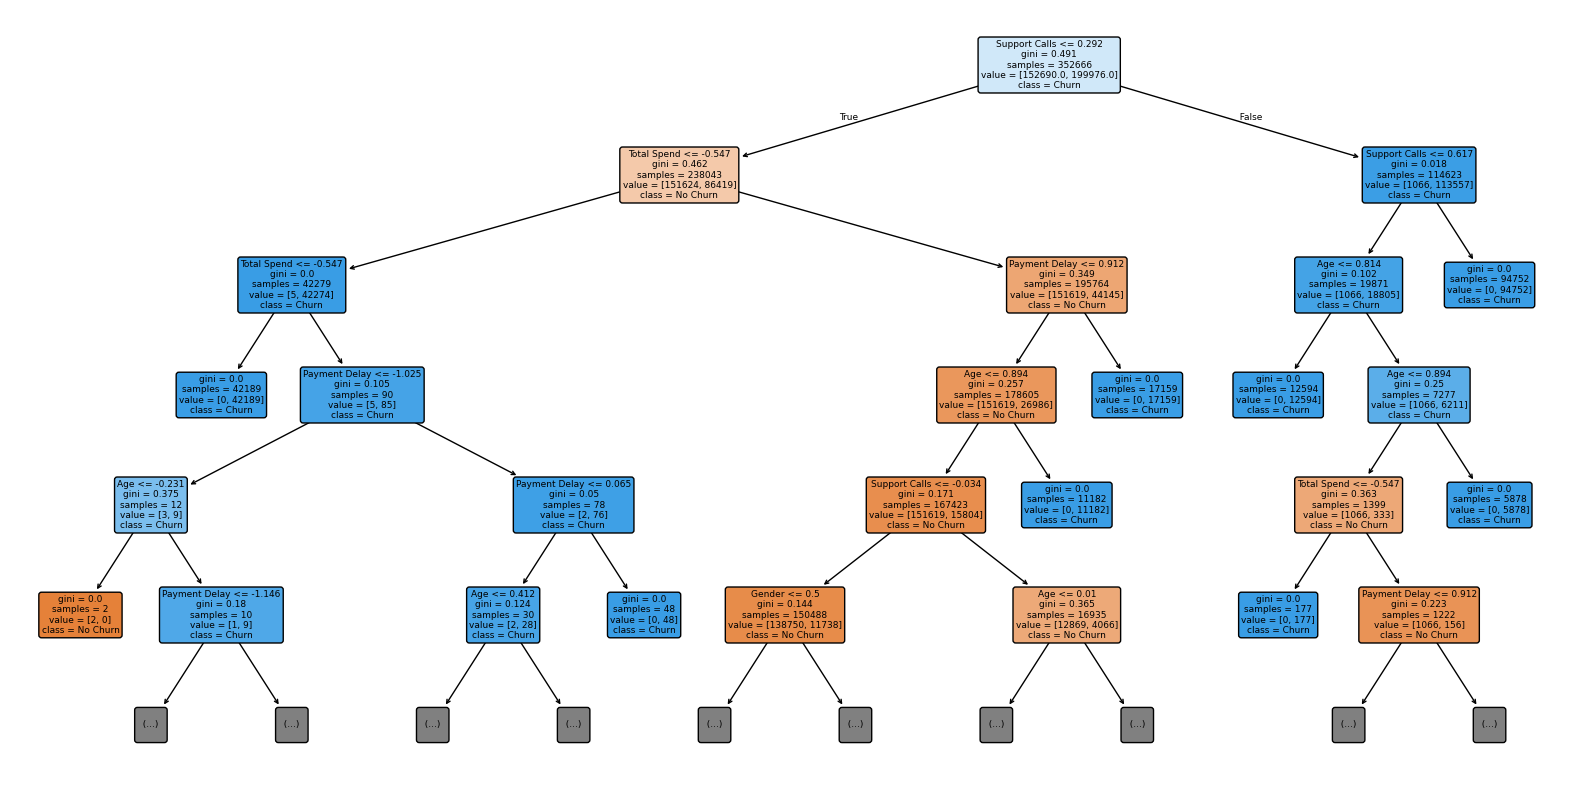

In [119]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt,
          feature_names=X_train.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          max_depth=5)  # Limit depth for readability
plt.show()

In [120]:
def get_business_rules(tree, feature_names, scaler=None):
    """Generate simplified business rules from the decision tree"""
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []

    def recurse(node, rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            # If we scaled the data, get approximate original threshold
            if scaler:
                try:
                    col_idx = list(feature_names).index(name)
                    mean = scaler.mean_[col_idx]
                    scale = scaler.scale_[col_idx]
                    original_threshold = threshold * scale + mean
                except:
                    original_threshold = threshold
            else:
                original_threshold = threshold

            left_rule = rule + [f"{name} ≤ {original_threshold:.2f}"]
            recurse(tree_.children_left[node], left_rule)
            right_rule = rule + [f"{name} > {original_threshold:.2f}"]
            recurse(tree_.children_right[node], right_rule)
        else:
            class_prob = tree_.value[node][0]
            total = class_prob.sum()
            churn_prob = class_prob[1]/total
            if churn_prob > 0.5:  # Only show rules that lead to churn
                rules.append({
                    'rule': " AND ".join(rule),
                    'churn_probability': churn_prob
                })

    recurse(0, [])
    return sorted(rules, key=lambda x: x['churn_probability'], reverse=True)

# Get business rules (pass the scaler to get approximate original values)
business_rules = get_business_rules(dt, X_train.columns, scaler)

print("Top Business Rules Leading to Churn:")
for i, rule in enumerate(business_rules[:5], 1):
    print(f"\nRule {i}: {rule['rule']}")
    print(f"Churn probability: {rule['churn_probability']:.2%}")

Top Business Rules Leading to Churn:

Rule 1: Support Calls ≤ 15.37 AND Total Spend ≤ 9.78 AND Total Spend ≤ 9.78
Churn probability: 100.00%

Rule 2: Support Calls ≤ 15.37 AND Total Spend ≤ 9.78 AND Total Spend > 9.78 AND Payment Delay ≤ 384.76 AND Age > 36.50 AND Payment Delay ≤ 355.60
Churn probability: 100.00%

Rule 3: Support Calls ≤ 15.37 AND Total Spend ≤ 9.78 AND Total Spend > 9.78 AND Payment Delay ≤ 384.76 AND Age > 36.50 AND Payment Delay > 355.60 AND Last Interaction > 0.41
Churn probability: 100.00%

Rule 4: Support Calls ≤ 15.37 AND Total Spend ≤ 9.78 AND Total Spend > 9.78 AND Payment Delay > 384.76 AND Payment Delay ≤ 647.19 AND Age ≤ 44.50 AND Payment Delay ≤ 618.03 AND Last Interaction ≤ -0.17 AND Last Interaction ≤ -0.35
Churn probability: 100.00%

Rule 5: Support Calls ≤ 15.37 AND Total Spend ≤ 9.78 AND Total Spend > 9.78 AND Payment Delay > 384.76 AND Payment Delay ≤ 647.19 AND Age ≤ 44.50 AND Payment Delay ≤ 618.03 AND Last Interaction > -0.17
Churn probability: 10

In [121]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

with open("encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("churn_model.pkl", "rb") as f:
    dt = pickle.load(f)

# Identify categorical and numerical columns
categorical_cols = ['Gender']
numerical_cols = ['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Raw input
custom_input = {
    "Age": 30,
    "Gender": "Female",
    "Support Calls": 5,
    "Payment Delay": 18,
    "Total Spend": 932,
    "Last Interaction": 17
}

# Encode categorical inputs using pre-trained encoders
for col in categorical_cols:
    custom_input[col] = label_encoders[col].transform([custom_input[col]])[0]

# Convert to DataFrame
custom_input_df = pd.DataFrame([custom_input])

# Scale numerical features using pre-trained scaler
custom_input_df[numerical_cols] = scaler.transform(custom_input_df[numerical_cols])

# Ensure column order matches training data
custom_input_df = custom_input_df[dt.feature_names_in_]

# Make prediction
predicted_churn = dt.predict(custom_input_df)[0]

# Output result
print("Custom Input:", custom_input)
print("Predicted Churn:", "Yes" if predicted_churn == 1 else "No")


Custom Input: {'Age': 30, 'Gender': np.int64(0), 'Support Calls': 5, 'Payment Delay': 18, 'Total Spend': 932, 'Last Interaction': 17}
Predicted Churn: Yes


In [122]:
def get_retention_recommendation(customer_data, prediction):
    """
    Provides retention recommendations based on customer profile and churn prediction,
    incorporating insights from decision tree rules.

    Args:
        customer_data (dict): Dictionary containing customer's features
        prediction (int): 1 if churn predicted, 0 otherwise

    Returns:
        dict: Dictionary containing recommendation details
    """
    if prediction == 0:
        return {
            "action": "No immediate action needed",
            "message": "Customer is not predicted to churn. Maintain current engagement."
        }

    recommendations = []

    # Support Calls-based recommendations (from decision tree rules)
    if customer_data['Support Calls'] >= 8:  # High support calls indicate issues
        if customer_data['Support Calls'] >= 15:
            recommendations.append({
                "feature": "VIP Support",
                "description": "Immediate escalation to senior support team with 24hr resolution SLA",
                "rationale": f"Extremely high support calls ({customer_data['Support Calls']}) indicate serious unresolved issues"
            })
        else:
            recommendations.append({
                "feature": "Dedicated Support",
                "description": "Assign a dedicated account manager for immediate issue resolution",
                "rationale": f"Multiple support calls ({customer_data['Support Calls']}) suggest recurring problems"
            })

    # Payment Delay-based recommendations (from decision tree thresholds)
    if customer_data['Payment Delay'] > 10:
        if customer_data['Payment Delay'] > 30:
            recommendations.append({
                "feature": "Payment Relief",
                "description": "Offer payment plan with first month free and reduced installments",
                "rationale": f"Severe payment delay ({customer_data['Payment Delay']} days) indicates financial distress"
            })
        else:
            recommendations.append({
                "feature": "Payment Flexibility",
                "description": "Waive late fees and extend due date by 2 weeks",
                "rationale": f"Payment delay ({customer_data['Payment Delay']} days) may indicate temporary cash flow issues"
            })

    # Total Spend-based recommendations (aligned with decision tree splits)
    if customer_data['Total Spend'] < 1000:  # Approximate threshold from rules
        recommendations.append({
            "feature": "Value Boost",
            "description": "Free upgrade to premium features for 60 days",
            "rationale": f"Mid-range spending (${customer_data['Total Spend']}) suggests opportunity to demonstrate value"
        })
    else:
        recommendations.append({
            "feature": "Elite Retention",
            "description": "Personalized account review with executive team and custom benefits package",
            "rationale": f"High-value customer (${customer_data['Total Spend']}) worth exceptional retention efforts"
        })

    # Age-based recommendations (from decision tree splits)
    if customer_data['Age'] <= 44:
        recommendations.append({
            "feature": "Next-Gen Engagement",
            "description": "Access to beta features and innovation community",
            "rationale": f"Younger customer (age {customer_data['Age']}) may value cutting-edge features"
        })

    # Last Interaction-based recommendations
    if customer_data['Last Interaction'] > 20:  # Days since last interaction
        recommendations.append({
            "feature": "Reactivation Campaign",
            "description": "Personalized We want you back offer with time-sensitive benefits",
            "rationale": f"{customer_data['Last Interaction']} days since last interaction indicates disengagement"
        })

    # Prioritize recommendations by likely impact
    prioritized_recommendations = sorted(
        recommendations,
        key=lambda x: 1 if "Crisis" in x["feature"] else
                      2 if "VIP" in x["feature"] else
                      3 if "Payment" in x["feature"] else 4
    )

    return {
        "action": "Immediate retention action required",
        "message": f"Customer matches {len(recommendations)} key churn indicators",
        "recommendations": prioritized_recommendations
    }

# Enhanced prediction function with better formatting
def predict_churn_with_recommendations(custom_input):
    """
    Enhanced prediction function that includes retention recommendations
    with improved output formatting and explanation
    """
    # Encode and prepare data
    encoded_input = custom_input.copy()
    for col in categorical_cols:
        encoded_input[col] = label_encoders[col].transform([encoded_input[col]])[0]

    custom_input_df = pd.DataFrame([encoded_input])
    custom_input_df[numerical_cols] = scaler.transform(custom_input_df[numerical_cols])
    custom_input_df = custom_input_df[dt.feature_names_in_]

    # Make prediction with probabilities
    predicted_churn = dt.predict(custom_input_df)[0]
    churn_prob = dt.predict_proba(custom_input_df)[0][1]

    # Get retention recommendations
    recommendations = get_retention_recommendation(custom_input, predicted_churn)

    # Prepare detailed output
    result = {
        "customer_data": custom_input,
        "prediction": "Yes" if predicted_churn == 1 else "No",
        "churn_probability": f"{churn_prob:.1%}",
        "retention_advice": recommendations,
        "key_risk_factors": [
            f"High support calls ({custom_input['Support Calls']})" if custom_input['Support Calls'] >= 8 else None,
            f"Payment delay ({custom_input['Payment Delay']} days)" if custom_input['Payment Delay'] > 10 else None,
            f"Recent inactivity ({custom_input['Last Interaction']} days)" if custom_input['Last Interaction'] > 20 else None
        ]
    }
    result["key_risk_factors"] = [x for x in result["key_risk_factors"] if x is not None]

    return result

# Example usage with enhanced output
sample_customer = {
    "Age": 30,
    "Gender": "Female",
    "Support Calls": 5,
    "Payment Delay": 18,
    "Total Spend": 932,
    "Last Interaction": 17
}

result = predict_churn_with_recommendations(sample_customer)

# Improved output formatting
print("\n🚀 Customer Churn Analysis Report")
print("="*60)
print(f"\n🔍 Customer Profile:")
for k, v in result['customer_data'].items():
    print(f"  - {k}: {v}")

print(f"\n⚠️ Churn Prediction: {result['prediction']} (Probability: {result['churn_probability']})")

if result['prediction'] == "Yes":
    print("\n🔑 Key Risk Factors Identified:")
    for factor in result['key_risk_factors']:
        print(f"  - {factor}")

    print("\n🛡️ Recommended Retention Actions:")
    for i, rec in enumerate(result['retention_advice']['recommendations'], 1):
        print(f"\n{i}. {rec['feature']}")
        print(f"   💡 Offer: {rec['description']}")
        print(f"   📊 Rationale: {rec['rationale']}")

    print("\n" + "="*60)
    print(f"💼 Business Impact: {result['retention_advice']['message']}")
    print(f"🚨 Action Required: {result['retention_advice']['action']}")


🚀 Customer Churn Analysis Report

🔍 Customer Profile:
  - Age: 30
  - Gender: Female
  - Support Calls: 5
  - Payment Delay: 18
  - Total Spend: 932
  - Last Interaction: 17

⚠️ Churn Prediction: Yes (Probability: 100.0%)

🔑 Key Risk Factors Identified:
  - Payment delay (18 days)

🛡️ Recommended Retention Actions:

1. Payment Flexibility
   💡 Offer: Waive late fees and extend due date by 2 weeks
   📊 Rationale: Payment delay (18 days) may indicate temporary cash flow issues

2. Value Boost
   💡 Offer: Free upgrade to premium features for 60 days
   📊 Rationale: Mid-range spending ($932) suggests opportunity to demonstrate value

3. Next-Gen Engagement
   💡 Offer: Access to beta features and innovation community
   📊 Rationale: Younger customer (age 30) may value cutting-edge features

💼 Business Impact: Customer matches 3 key churn indicators
🚨 Action Required: Immediate retention action required
